# Statistics ML

- Learning rate os too big, algorithm disconverge.

### References:
1. https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [3]:
train_file = ".\\input\\train.csv"
test_file = ".\\input\\test.csv"
# output_file = ".\\output\\submission.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)

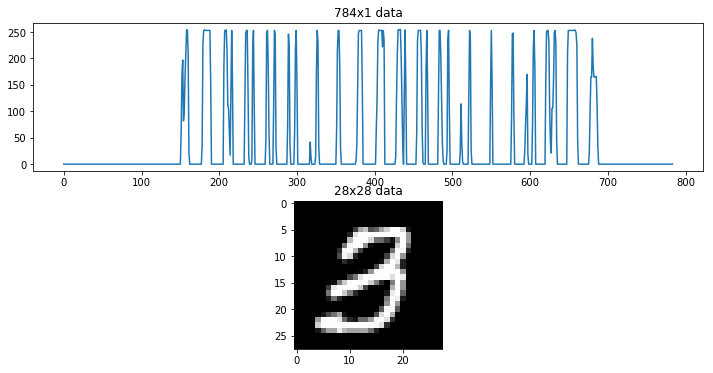

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

(784,)


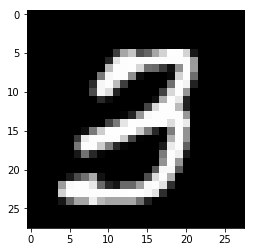

In [6]:
# print(x_train.shape)
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_val = x_val.reshape(-1, 28, 28, 1)
# print(x_train.shape)
print(x_train[0].shape)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [7]:
# x_train = x_train.astype("float32")/255.
# x_val = x_val.astype("float32")/255.

In [8]:
print(y_train[0])
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# #example:
# print(y_train[0])

3


## Build model

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def my_GridSearchCV(model, parameters):
    if parameters:
        clf = GridSearchCV(model, parameters)
    else:
        clf = model
    clf.fit(x_train, y_train)
    return clf

def ny_train(models):
    clfs = {}
    for key, value in models.items():
        print('train: ' + key)
        clf = my_GridSearchCV(value['model'], value['param'])
        clfs[key] = clf
    return clfs

def my_predict(clfs, x_val=x_val, y_val=y_val):
    result = {}
    for key, value in clfs.items():
        print('predict val: ' + key)
        y_pred = value.predict(x_val)
        result[key] = accuracy_score(y_val, y_pred)
    return result

In [10]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

models = {}
models = {
#     'SVC': {
#         'model': SVC(),
#         'param': {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
#     },
    'GaussianNB':{
        'model': GaussianNB(),
        'param': {}
    },
#     'AdaBoostClassifier':{
#         'model': AdaBoostClassifier(),
#         'param': {}
#     },
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param': {}
    }
}

clfs = ny_train(models)
val_result = my_predict(clfs)
print(val_result)
final_acc = val_result['RandomForestClassifier']

train: RandomForestClassifier
train: GaussianNB
predict val: GaussianNB
predict val: RandomForestClassifier
{'RandomForestClassifier': 0.94142857142857139, 'GaussianNB': 0.55452380952380953}


## Predict

In [11]:
import time
import os

project_name = 'Digit_Recognizer'
step_name = 'Predict'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
output_file = os.path.join(cwd, 'output', run_name + '.csv')
print(output_file)

Digit_Recognizer_Predict_20171027_065921_9414
D:\Kaggle\Digit_Recognizer\output\Digit_Recognizer_Predict_20171027_065921_9414.csv


In [12]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
# x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [13]:
y_hat = clfs['RandomForestClassifier'].predict(x_test)

In [14]:
# y_pred = np.argmax(y_hat,axis=1)
y_pred = y_hat

In [15]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [16]:
print('Done!')

Done!
